# Machine Learning: Ensemble Algorithms 🎭

**Python for Machine Learning Course**  
**Instructor: Siva | Metro State University**

---

## 📚 What We'll Learn Today

In this notebook, we'll implement and compare three powerful ensemble methods:

1. **Boosting** 🎯 - Sequential learning from mistakes
   - AdaBoost
   - Gradient Boosting
   - XGBoost

2. **Stacking** 🏗️ - Meta-learning approach

3. **Voting** 🗳️ - Democratic decision making
   - Hard Voting
   - Soft Voting

Let's get started! 🚀

## 🔧 Setup: Import Libraries

First, let's import all the libraries we'll need:

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Dataset
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Machine Learning - Base Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Machine Learning - Ensemble Methods
from sklearn.ensemble import (
    AdaBoostClassifier,           # Boosting
    GradientBoostingClassifier,   # Boosting
    StackingClassifier,           # Stacking
    VotingClassifier              # Voting
)

# XGBoost (install if needed: pip install xgboost)
try:
    import xgboost as xgb
    print("✅ XGBoost is installed!")
except ImportError:
    print("⚠️ XGBoost not installed. Run: pip install xgboost")

# Metrics
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("🎉 All libraries imported successfully!")

✅ XGBoost is installed!
🎉 All libraries imported successfully!


## 📊 Load and Prepare Data

We'll use the **Breast Cancer Wisconsin** dataset - a real medical dataset for binary classification!

In [2]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

print("📋 Dataset Information:")
print(f"   Number of samples: {X.shape[0]}")
print(f"   Number of features: {X.shape[1]}")
print(f"   Classes: {data.target_names}")
print(f"   Class distribution: {np.bincount(y)}")

# Create a DataFrame for easier exploration
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
df['target_name'] = df['target'].map({0: 'malignant', 1: 'benign'})

print("\n🔍 First few rows:")
df.head()

📋 Dataset Information:
   Number of samples: 569
   Number of features: 30
   Classes: ['malignant' 'benign']
   Class distribution: [212 357]

🔍 First few rows:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_name
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [3]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale the features (important for some algorithms like SVM and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data split and scaled!")
print(f"   Training samples: {X_train.shape[0]}")
print(f"   Testing samples: {X_test.shape[0]}")

✅ Data split and scaled!
   Training samples: 398
   Testing samples: 171


---

## 1. Boosting Algorithms 🎯

**Remember**: Boosting trains models sequentially, with each model focusing on the mistakes of previous models!

### 1.1 AdaBoost (Adaptive Boosting)

In [4]:
print("🎯 Training AdaBoost Classifier...\n")

# Create a weak learner (shallow decision tree)
weak_learner = DecisionTreeClassifier(max_depth=1, random_state=42)

# Create AdaBoost classifier
ada_boost = AdaBoostClassifier(
    estimator=weak_learner,
    n_estimators=50,      # Number of boosting rounds
    learning_rate=1.0,    # Weight of each classifier
    random_state=42
)

# Train the model
ada_boost.fit(X_train_scaled, y_train)

# Make predictions
ada_predictions = ada_boost.predict(X_test_scaled)
ada_accuracy = accuracy_score(y_test, ada_predictions)

print(f"✅ AdaBoost Accuracy: {ada_accuracy:.4f}")
print("\n📊 Classification Report:")
print(classification_report(y_test, ada_predictions, target_names=data.target_names))

🎯 Training AdaBoost Classifier...

✅ AdaBoost Accuracy: 0.9591

📊 Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.91      0.94        64
      benign       0.95      0.99      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



### 1.2 Gradient Boosting

In [5]:
print("🎯 Training Gradient Boosting Classifier...\n")

# Create Gradient Boosting classifier
gb_model = GradientBoostingClassifier(
    n_estimators=100,        # Number of boosting stages
    learning_rate=0.1,       # Shrinks the contribution of each tree
    max_depth=3,             # Maximum depth of individual trees
    subsample=0.8,           # Fraction of samples for fitting trees
    random_state=42
)

# Train the model
gb_model.fit(X_train_scaled, y_train)

# Make predictions
gb_predictions = gb_model.predict(X_test_scaled)
gb_accuracy = accuracy_score(y_test, gb_predictions)

print(f"✅ Gradient Boosting Accuracy: {gb_accuracy:.4f}")
print("\n📊 Classification Report:")
print(classification_report(y_test, gb_predictions, target_names=data.target_names))

🎯 Training Gradient Boosting Classifier...

✅ Gradient Boosting Accuracy: 0.9591

📊 Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.91      0.94        64
      benign       0.95      0.99      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



### 1.3 XGBoost (Extreme Gradient Boosting) ⭐

**The champion of ML competitions!**

In [6]:
print("🎯 Training XGBoost Classifier...\n")

# Create XGBoost classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,    # Fraction of features for each tree
    random_state=42,
    eval_metric='logloss'    # Suppress warning
)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

print(f"✅ XGBoost Accuracy: {xgb_accuracy:.4f}")
print("\n📊 Classification Report:")
print(classification_report(y_test, xgb_predictions, target_names=data.target_names))

🎯 Training XGBoost Classifier...

✅ XGBoost Accuracy: 0.9532

📊 Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.92      0.94        64
      benign       0.95      0.97      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



### 📊 Visualize Boosting Performance

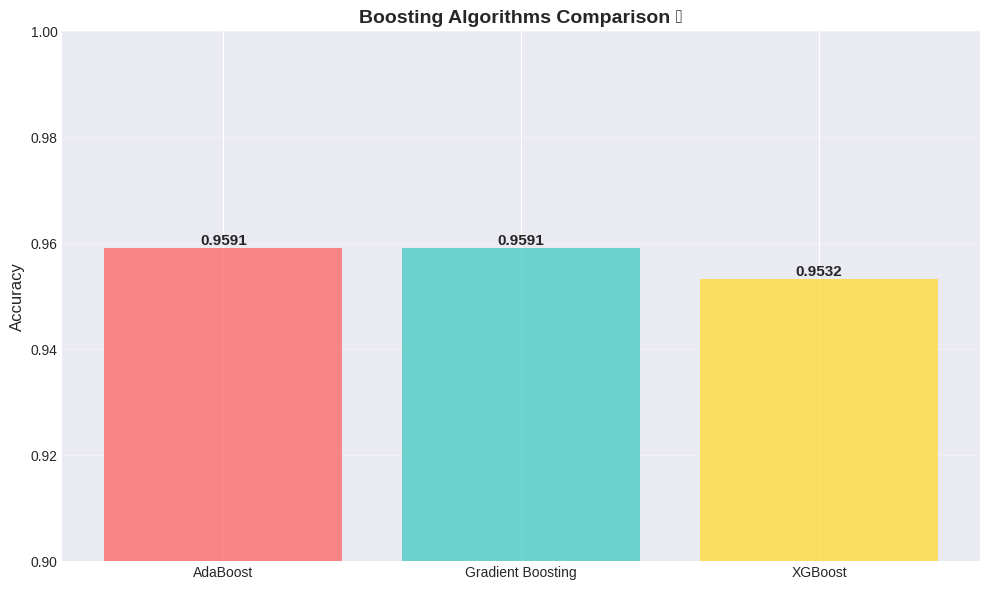

In [7]:
# Compare boosting algorithms
boosting_results = {
    'AdaBoost': ada_accuracy,
    'Gradient Boosting': gb_accuracy,
    'XGBoost': xgb_accuracy
}

plt.figure(figsize=(10, 6))
bars = plt.bar(boosting_results.keys(), boosting_results.values(),
               color=['#FF6B6B', '#4ECDC4', '#FFD93D'], alpha=0.8)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Boosting Algorithms Comparison 🎯', fontsize=14, weight='bold')
plt.ylim([0.9, 1.0])

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom', fontsize=11, weight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 🔍 Feature Importance from XGBoost

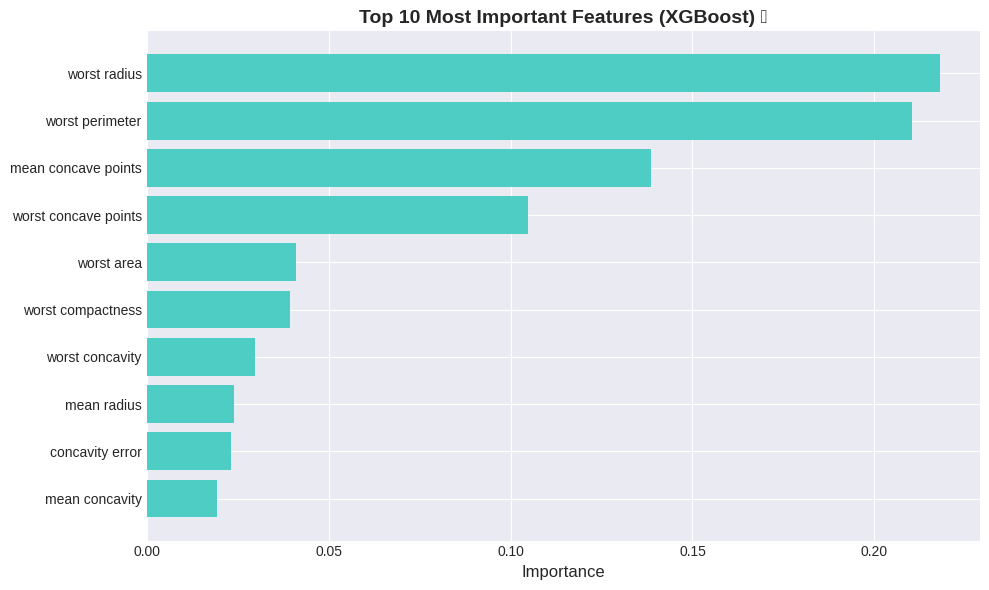


📊 Top 10 Features:
                 feature  importance
20          worst radius    0.218112
22       worst perimeter    0.210241
7    mean concave points    0.138589
27  worst concave points    0.104688
23            worst area    0.041037
25     worst compactness    0.039413
26       worst concavity    0.029794
0            mean radius    0.023910
16       concavity error    0.023129
6         mean concavity    0.019343


In [8]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': data.feature_names,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'], color='#4ECDC4')
plt.xlabel('Importance', fontsize=12)
plt.title('Top 10 Most Important Features (XGBoost) 🌟', fontsize=14, weight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n📊 Top 10 Features:")
print(feature_importance)

---

## 2. Stacking 🏗️

**Remember**: Stacking uses predictions from multiple base models as features for a meta-model!

### 🔍 Building Stacking Classifier with some base models

In [9]:
print("🏗️ Building Stacking Classifier...\n")

# Define diverse base models (Level 0)
base_models = [
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('svm', SVC(probability=True, random_state=42, kernel='rbf')),
    ('nb', GaussianNB())
]

# Define meta-model (Level 1)
meta_model = LogisticRegression(random_state=42, max_iter=1000)

# Create stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,  # Use 5-fold cross-validation
    stack_method='predict_proba'  # Use probabilities as meta-features
)

print("📋 Base Models (Level 0):")
for name, model in base_models:
    print(f"   - {name}: {model.__class__.__name__}")
print(f"\n🎯 Meta-Model (Level 1): {meta_model.__class__.__name__}")
print("\n⏳ Training stacking ensemble (this may take a moment)...")

🏗️ Building Stacking Classifier...

📋 Base Models (Level 0):
   - dt: DecisionTreeClassifier
   - rf: RandomForestClassifier
   - knn: KNeighborsClassifier
   - svm: SVC
   - nb: GaussianNB

🎯 Meta-Model (Level 1): LogisticRegression

⏳ Training stacking ensemble (this may take a moment)...


In [10]:
# Train the stacking classifier
stacking_clf.fit(X_train_scaled, y_train)

# Make predictions
stacking_predictions = stacking_clf.predict(X_test_scaled)
stacking_accuracy = accuracy_score(y_test, stacking_predictions)

print(f"✅ Stacking Accuracy: {stacking_accuracy:.4f}")
print("\n📊 Classification Report:")
print(classification_report(y_test, stacking_predictions, target_names=data.target_names))

✅ Stacking Accuracy: 0.9649

📊 Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.91      0.95        64
      benign       0.95      1.00      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



### 🔍 Compare Base Models vs Stacking

📊 Comparing Individual Base Models with Stacking:

   DT   : 0.9298
   RF   : 0.9415
   KNN  : 0.9591
   SVM  : 0.9766
   NB   : 0.9357

   STACK: 0.9649 🏆


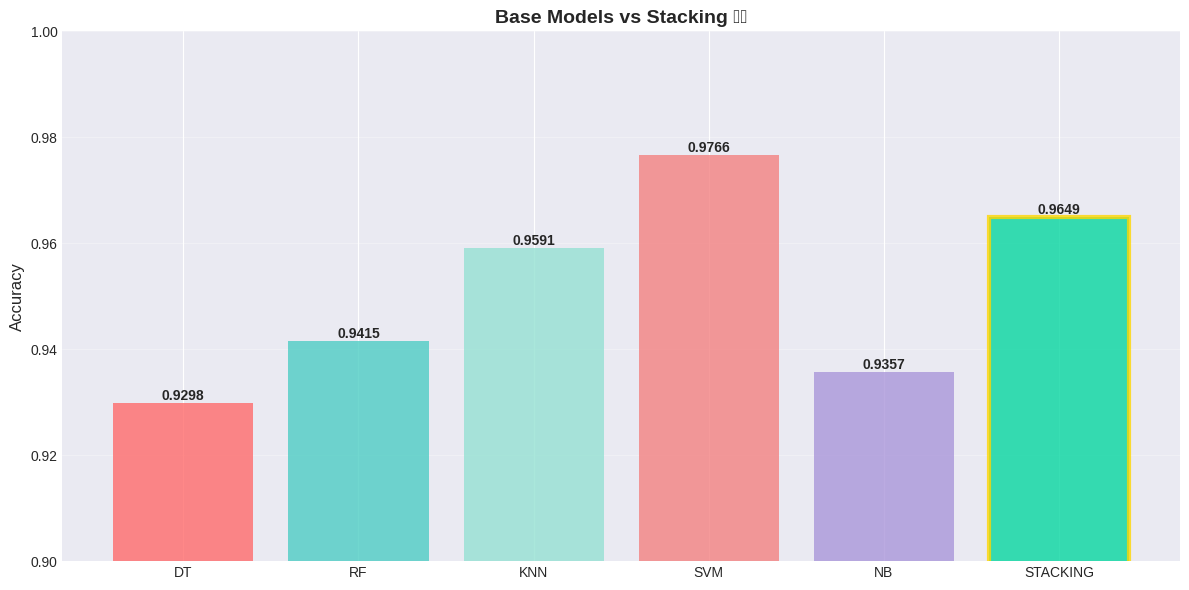

In [11]:
print("📊 Comparing Individual Base Models with Stacking:\n")

# Evaluate each base model individually
base_results = {}
for name, model in base_models:
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    base_results[name.upper()] = accuracy
    print(f"   {name.upper():5s}: {accuracy:.4f}")

print(f"\n   STACK: {stacking_accuracy:.4f} 🏆")

# Visualize comparison
all_results = {**base_results, 'STACKING': stacking_accuracy}

plt.figure(figsize=(12, 6))
colors = ['#FF6B6B', '#4ECDC4', '#95E1D3', '#F38181', '#AA96DA', '#06D6A0']
bars = plt.bar(all_results.keys(), all_results.values(), color=colors, alpha=0.8)

# Highlight stacking
bars[-1].set_edgecolor('gold')
bars[-1].set_linewidth(3)

plt.ylabel('Accuracy', fontsize=12)
plt.title('Base Models vs Stacking 🏗️', fontsize=14, weight='bold')
plt.ylim([0.9, 1.0])

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom', fontsize=10, weight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

---

## 3. Voting Classifier 🗳️

**Remember**: Voting allows multiple models to "vote" on the final prediction!

### 3.1 Hard Voting (Majority Vote)

In [12]:
print("🗳️ Building Hard Voting Classifier...\n")

# Define models for voting
voting_models = [
    ('rf', RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('lr', LogisticRegression(random_state=42, max_iter=1000))
]

# Create hard voting classifier
hard_voting_clf = VotingClassifier(
    estimators=voting_models,
    voting='hard'  # Use majority voting
)

# Train the model
hard_voting_clf.fit(X_train_scaled, y_train)

# Make predictions
hard_predictions = hard_voting_clf.predict(X_test_scaled)
hard_accuracy = accuracy_score(y_test, hard_predictions)

print(f"✅ Hard Voting Accuracy: {hard_accuracy:.4f}")
print("\n📊 Classification Report:")
print(classification_report(y_test, hard_predictions, target_names=data.target_names))

🗳️ Building Hard Voting Classifier...

✅ Hard Voting Accuracy: 0.9766

📊 Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        64
      benign       0.98      0.98      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



### 3.2 Soft Voting (Average Probabilities)

In [13]:
print("🗳️ Building Soft Voting Classifier...\n")

# Create soft voting classifier
soft_voting_clf = VotingClassifier(
    estimators=voting_models,
    voting='soft',  # Use probability averaging
    weights=[2, 2, 1, 1]  # Give more weight to RF and GB
)

# Train the model
soft_voting_clf.fit(X_train_scaled, y_train)

# Make predictions
soft_predictions = soft_voting_clf.predict(X_test_scaled)
soft_accuracy = accuracy_score(y_test, soft_predictions)

print(f"✅ Soft Voting Accuracy: {soft_accuracy:.4f}")
print("\n📊 Classification Report:")
print(classification_report(y_test, soft_predictions, target_names=data.target_names))

🗳️ Building Soft Voting Classifier...

✅ Soft Voting Accuracy: 0.9591

📊 Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.91      0.94        64
      benign       0.95      0.99      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



### 📊 Compare Hard vs Soft Voting

📊 Hard Voting vs Soft Voting:

   RF   : 0.9415
   GB   : 0.9474
   SVM  : 0.9766
   LR   : 0.9883

   HARD:  0.9766
   SOFT:  0.9591 🏆


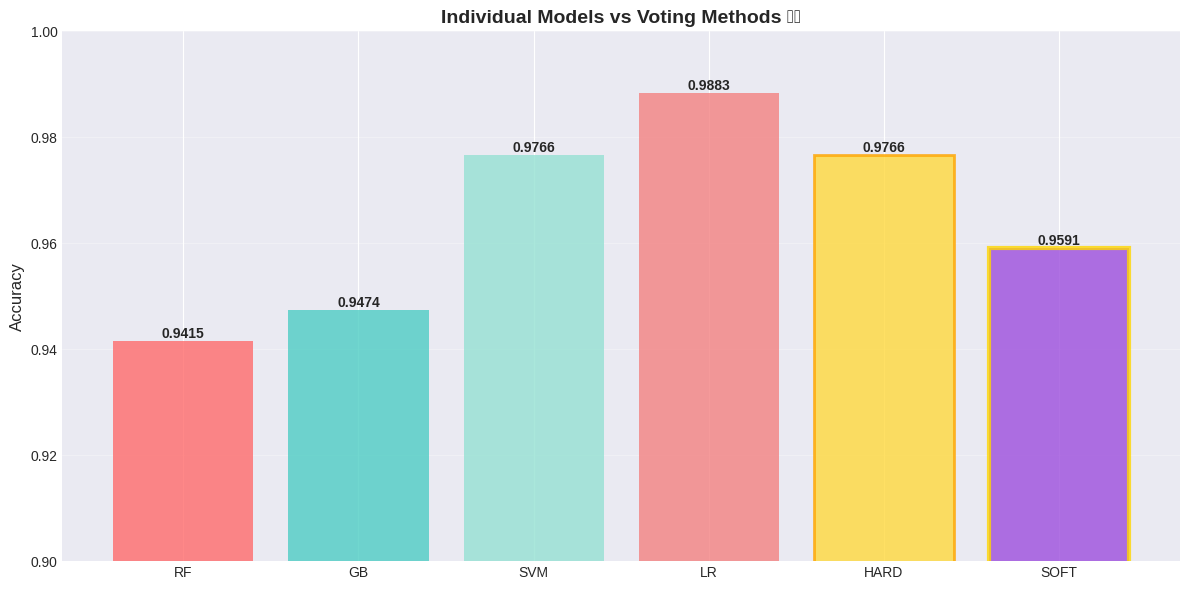

In [14]:
print("📊 Hard Voting vs Soft Voting:\n")

# Evaluate individual models
voting_individual_results = {}
for name, model in voting_models:
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    voting_individual_results[name.upper()] = accuracy
    print(f"   {name.upper():5s}: {accuracy:.4f}")

print(f"\n   HARD:  {hard_accuracy:.4f}")
print(f"   SOFT:  {soft_accuracy:.4f} 🏆")

# Visualize
all_voting_results = {
    **voting_individual_results,
    'HARD': hard_accuracy,
    'SOFT': soft_accuracy
}

plt.figure(figsize=(12, 6))
colors = ['#FF6B6B', '#4ECDC4', '#95E1D3', '#F38181', '#FFD93D', '#9D4EDD']
bars = plt.bar(all_voting_results.keys(), all_voting_results.values(),
               color=colors, alpha=0.8)

# Highlight voting methods
bars[-2].set_edgecolor('orange')
bars[-2].set_linewidth(2)
bars[-1].set_edgecolor('gold')
bars[-1].set_linewidth(3)

plt.ylabel('Accuracy', fontsize=12)
plt.title('Individual Models vs Voting Methods 🗳️', fontsize=14, weight='bold')
plt.ylim([0.9, 1.0])

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom', fontsize=10, weight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

---

## 🏆 Final Comparison: All Ensemble Methods


🏆 FINAL COMPARISON - ALL ENSEMBLE METHODS

📊 Ranking (Best to Worst):

   🥇 1. Hard Voting         : 0.9766
   🥈 2. Stacking            : 0.9649
   🥉 3. AdaBoost            : 0.9591
      4. Gradient Boosting   : 0.9591
      5. Soft Voting         : 0.9591
      6. XGBoost             : 0.9532


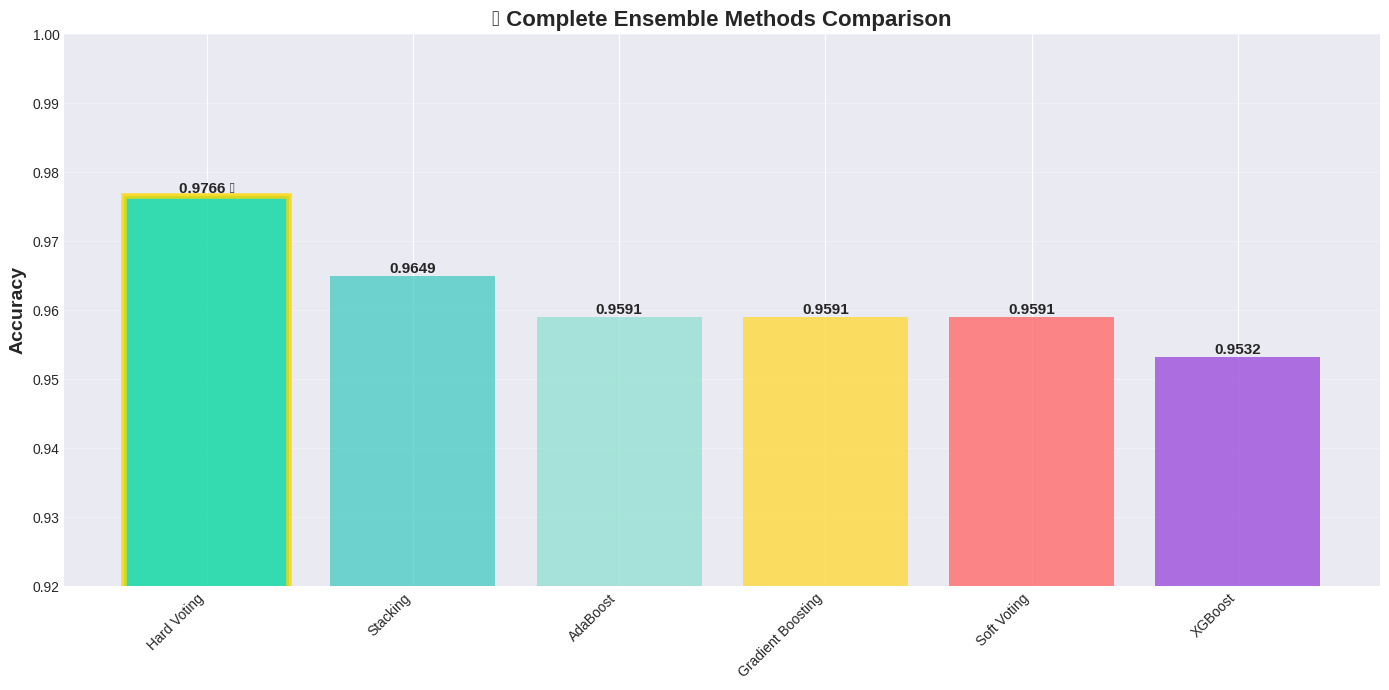

In [15]:
print("\n" + "="*60)
print("🏆 FINAL COMPARISON - ALL ENSEMBLE METHODS")
print("="*60 + "\n")

final_results = {
    'AdaBoost': ada_accuracy,
    'Gradient Boosting': gb_accuracy,
    'XGBoost': xgb_accuracy,
    'Stacking': stacking_accuracy,
    'Hard Voting': hard_accuracy,
    'Soft Voting': soft_accuracy
}

# Sort by accuracy
sorted_results = dict(sorted(final_results.items(), key=lambda x: x[1], reverse=True))

print("📊 Ranking (Best to Worst):\n")
for rank, (method, accuracy) in enumerate(sorted_results.items(), 1):
    medal = "🥇" if rank == 1 else "🥈" if rank == 2 else "🥉" if rank == 3 else "  "
    print(f"   {medal} {rank}. {method:20s}: {accuracy:.4f}")

# Create visualization
plt.figure(figsize=(14, 7))
colors = ['#06D6A0', '#4ECDC4', '#95E1D3', '#FFD93D', '#FF6B6B', '#9D4EDD']
bars = plt.bar(sorted_results.keys(), sorted_results.values(), color=colors, alpha=0.8)

# Highlight the winner
bars[0].set_edgecolor('gold')
bars[0].set_linewidth(4)

plt.ylabel('Accuracy', fontsize=14, weight='bold')
plt.title('🎭 Complete Ensemble Methods Comparison', fontsize=16, weight='bold')
plt.ylim([0.92, 1.0])
plt.xticks(rotation=45, ha='right')

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    label = f'{height:.4f}'
    if i == 0:
        label += ' 🏆'
    plt.text(bar.get_x() + bar.get_width()/2., height,
             label, ha='center', va='bottom', fontsize=11, weight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

---

## 📈 Confusion Matrices Comparison

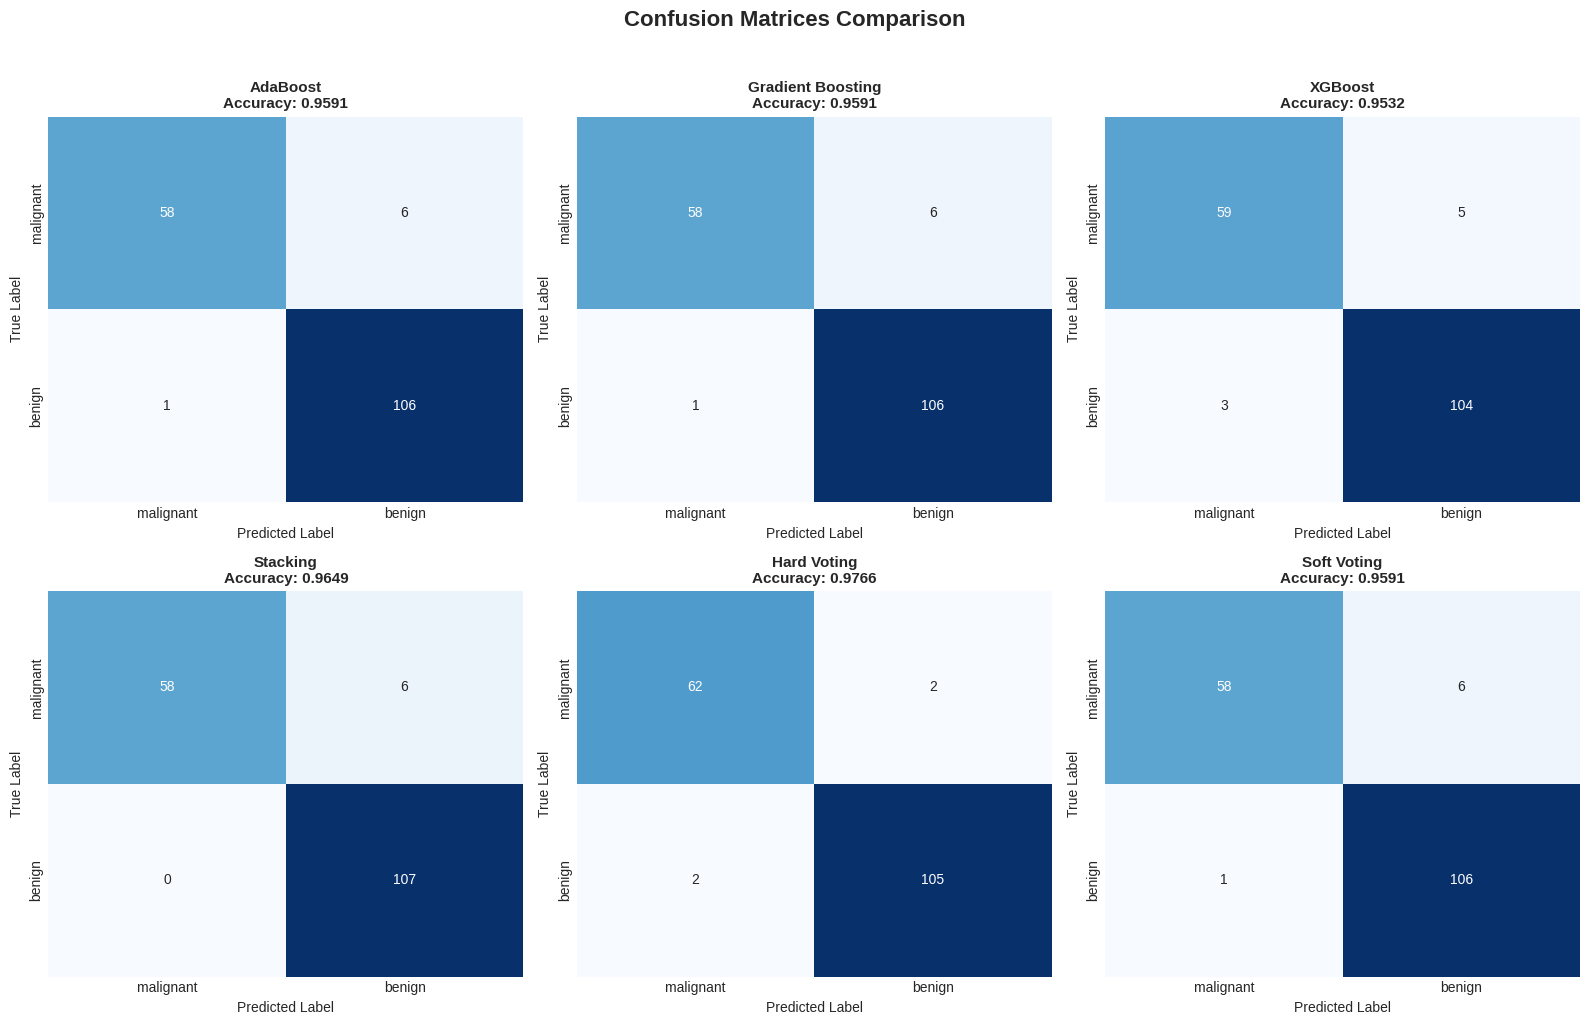

In [16]:
# Create confusion matrices for all methods
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Confusion Matrices Comparison', fontsize=16, weight='bold', y=1.02)

predictions_dict = {
    'AdaBoost': ada_predictions,
    'Gradient Boosting': gb_predictions,
    'XGBoost': xgb_predictions,
    'Stacking': stacking_predictions,
    'Hard Voting': hard_predictions,
    'Soft Voting': soft_predictions
}

for idx, (method, predictions) in enumerate(predictions_dict.items()):
    row = idx // 3
    col = idx % 3

    cm = confusion_matrix(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=data.target_names,
                yticklabels=data.target_names,
                ax=axes[row, col], cbar=False)

    axes[row, col].set_title(f'{method}\nAccuracy: {accuracy:.4f}',
                             fontsize=11, weight='bold')
    axes[row, col].set_ylabel('True Label')
    axes[row, col].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

---

## 🎓 Key Insights & Takeaways

### What Did We Learn?

1. **Boosting** 🎯
   - Sequential learning from mistakes
   - XGBoost often performs best
   - Great for competition-level performance

2. **Stacking** 🏗️
   - Uses meta-learning to combine models
   - Can leverage diversity of different algorithms
   - More complex but potentially more powerful

3. **Voting** 🗳️
   - Simple but effective
   - Soft voting usually beats hard voting
   - Easy to implement and understand

### Which Method Won? 🏆

Check the final comparison above! Often XGBoost or Stacking wins, but results vary by dataset.

### 💡 Pro Tips:

1. **Always use cross-validation** to get reliable estimates
2. **Tune hyperparameters** for each method
3. **Try multiple approaches** - what works best depends on your data
4. **Consider training time** vs accuracy tradeoff
5. **Ensemble diversity matters** - use different types of models!

---

## 🚀 Practice Exercises

### Exercise 1: Hyperparameter Tuning
Try different values for:
- `n_estimators` (50, 100, 200)
- `learning_rate` (0.01, 0.1, 1.0)
- `max_depth` (3, 5, 7, 10)

Which combination gives the best results?

### Exercise 2: Feature Selection
Use feature importance from XGBoost to select only the top 10 features. Does this improve performance?

### Exercise 3: Different Datasets
Try these ensemble methods on a different dataset (like iris or digits). Do the same methods win?

### Exercise 4: Custom Stacking
Create your own stacking ensemble with:
- 5 different base models of your choice
- A different meta-learner (try Random Forest or XGBoost as meta-learner)

### Exercise 5: Weighted Voting
Experiment with different weights in soft voting. Can you beat the default equal weights?

In [17]:
# YOUR CODE HERE for exercises
# Try out different experiments!


---

## 📚 Additional Resources

- **Scikit-learn Documentation**: https://scikit-learn.org/stable/modules/ensemble.html
- **XGBoost Documentation**: https://xgboost.readthedocs.io/
- **Kaggle Tutorials**: Search for "ensemble methods" on Kaggle

---

## 🎉 Congratulations!

You've successfully implemented and compared multiple ensemble methods!

**Key Takeaway**: Ensemble methods combine multiple models to create stronger predictions. Each method has its strengths:
- Use **Boosting** for maximum accuracy
- Use **Stacking** when you want to learn optimal combinations
- Use **Voting** for simplicity and interpretability

Keep experimenting! 🚀

---

*Python for Machine Learning Course*  
*Metro State University | Learn and Help Program*  
*Instructor: Siva*